In [3]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!

In [4]:
symbol ="AAPL TSLA MSFT SPY AMZN BABA GOOGL NFLX AAL PYPL COST"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2020-05-01",end="2021-02-09")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Date,Open,High,Low,Close
Date,,,,,
2020-04-30,18382.0,71.932410,73.066124,71.533010,72.885025
2020-05-01,18383.0,71.012053,74.175035,70.912823,71.711632
2020-05-04,18386.0,71.736440,72.857745,71.029419,72.726265
2020-05-05,18387.0,73.197610,74.671188,73.048762,73.817802
2020-05-06,18388.0,74.537215,75.226869,74.142774,74.579391
...,...,...,...,...,...
2021-02-02,18660.0,135.527476,136.106612,134.409152,134.788589
2021-02-03,18661.0,135.557435,135.567429,133.410649,133.740158
2021-02-04,18662.0,136.096628,137.194977,134.389172,137.184998


In [5]:
for i in range(len(num_name)):
     df[i]['up_band'], df[i]['mid_band'], df[i]['low_band'] = talib.BBANDS(df[i]['Close'], timeperiod =20)
df[5]

# or
# BB=[]
# for i in range(len(num_name)):
#     BB.append(talib.BBANDS(df[i]['Close'], timeperiod =20))

#BB= talib.BBANDS(df[0]['Close'], timeperiod =20)

,Date,Open,High,Low,Close,up_band,mid_band,low_band
Date,,,,,,,,
2020-04-30,18382.0,206.250000,206.699997,199.289993,202.669998,NaN,NaN,NaN
2020-05-01,18383.0,195.750000,197.380005,192.860001,194.479996,NaN,NaN,NaN
2020-05-04,18386.0,194.759995,195.000000,189.529999,191.149994,NaN,NaN,NaN
2020-05-05,18387.0,196.380005,198.270004,194.199997,195.020004,NaN,NaN,NaN
2020-05-06,18388.0,197.669998,198.910004,194.929993,195.169998,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-02-02,18660.0,264.570007,265.000000,254.039993,254.500000,276.202335,248.145000,220.087666
2021-02-03,18661.0,264.700012,268.279999,261.250000,263.429993,277.873403,249.296500,220.719598
2021-02-04,18662.0,269.579987,269.989990,265.558014,266.959991,279.003756,251.264000,223.524243


In [6]:
len(df)

11

In [7]:
# df[0][['Close','up_band','mid_band','low_band']].plot(figsize=(12,10))
# plt.show()

In [8]:
# fig,plt=plt.subplots(figsize=(12,7))
# plt.plot(range(len(BB[0])),BB[0])
# plt.plot(range(len(BB[0])),BB[1])
# plt.plot(range(len(BB[0])),BB[2])

In [9]:
#fig,plt=plt.subplots(figsize=(12,7))
# plt.plot(data.index,BB[0])
# plt.plot(data.index,BB[1])
# plt.plot(data.index,BB[2])

In [12]:
def plotBB(num):
  fig, ax_BB = plt.subplots()
  fig.set_size_inches((12, 8))

  candlestick_ohlc(ax_BB,df[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  
#   ax_BB.plot(data.index,BB[0])
#   ax_BB.plot(data.index,BB[1])
#   ax_BB.plot(data.index,BB[2])
#df[i]['up_band'], df[i]['mid_band'], df[i]['low_band']
  
  ax_BB.plot(data.index,df[num]['up_band'])
  ax_BB.plot(data.index,df[num]['mid_band'])
  ax_BB.plot(data.index,df[num]['low_band'])

  legend_labels= ['up_band','mid_band','low_band']
  ax_BB.legend(legend_labels,loc = 2)

  
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_BB.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  plt.title(num_name[num])
  fig.tight_layout()
  plt.grid()


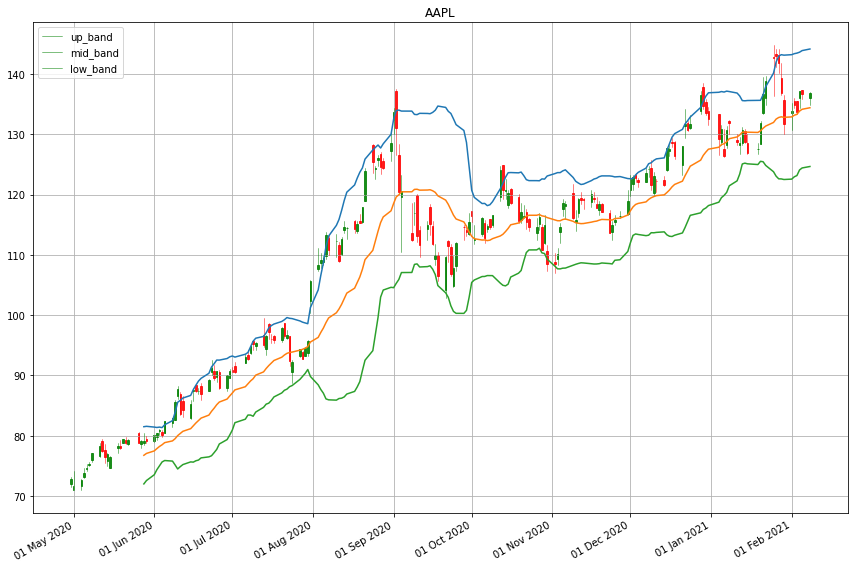

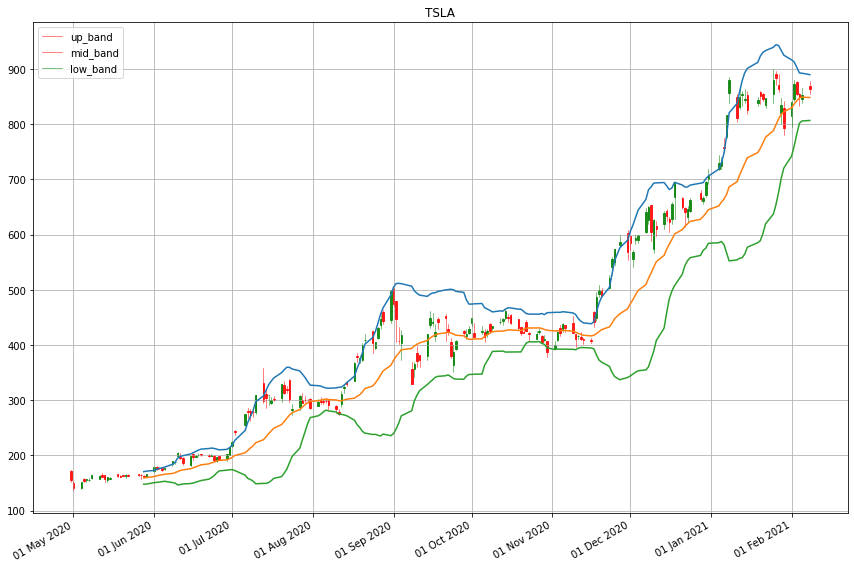

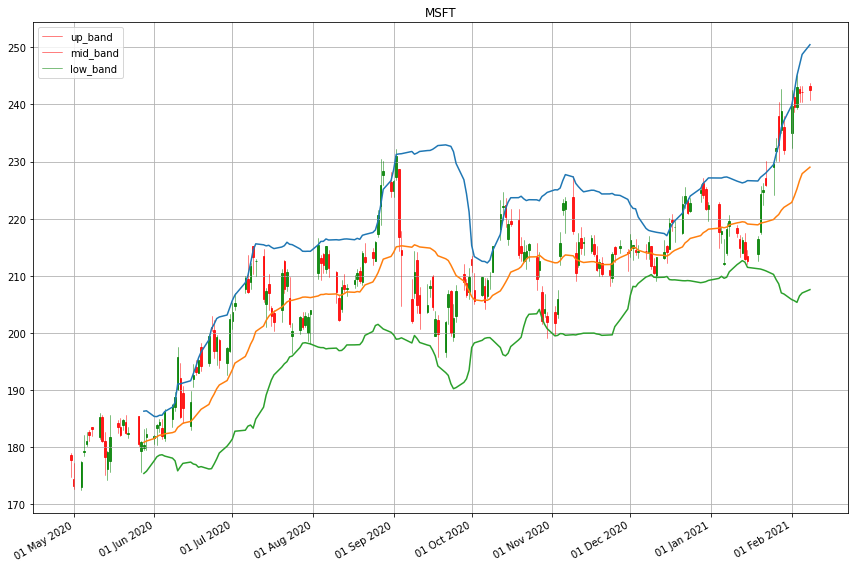

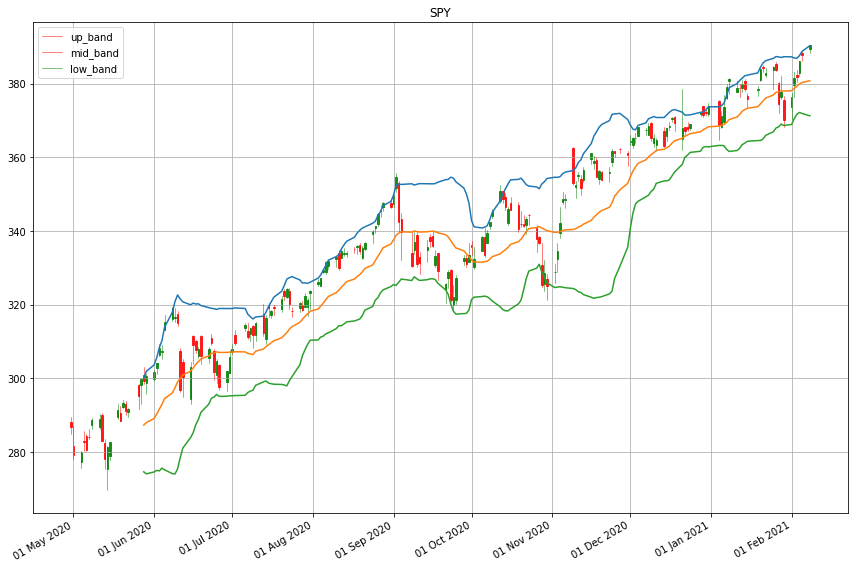

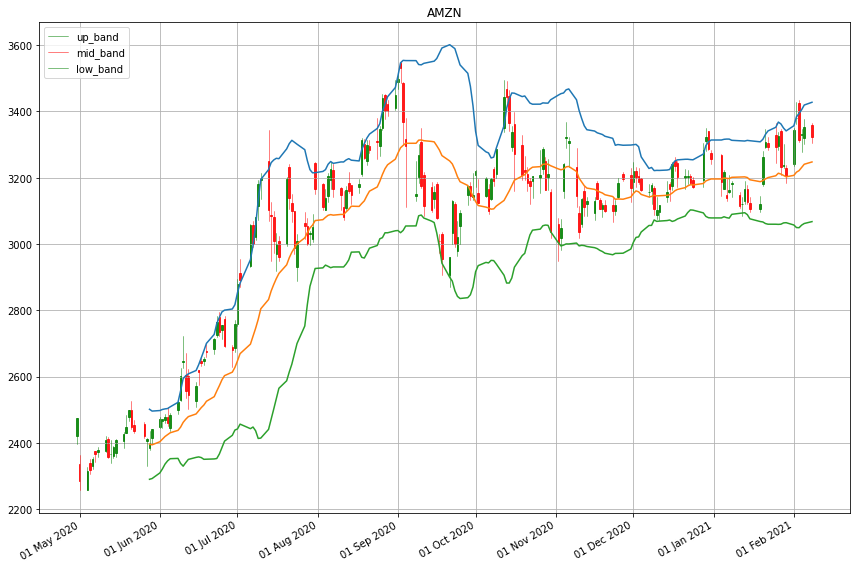

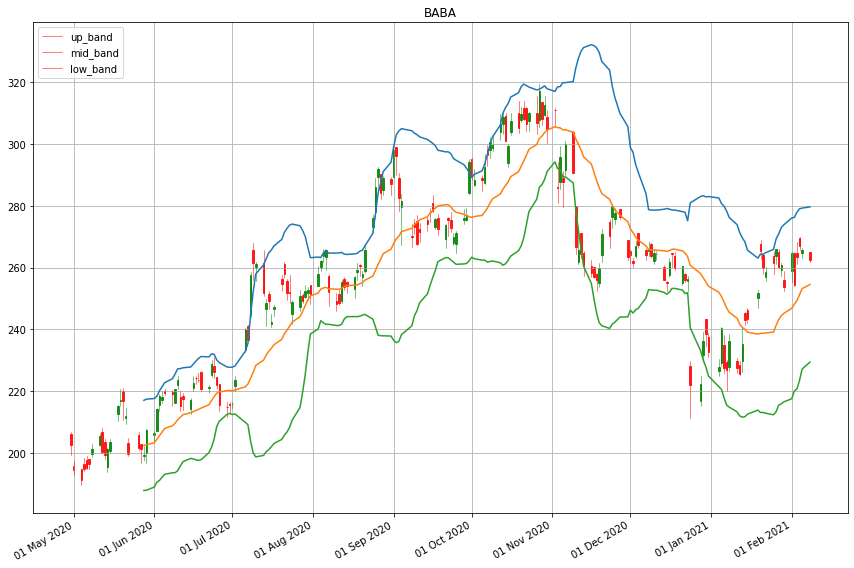

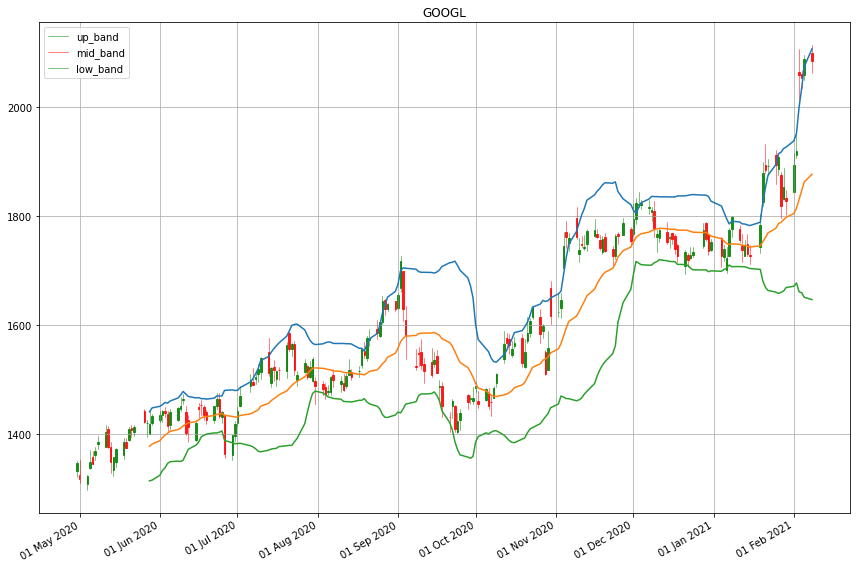

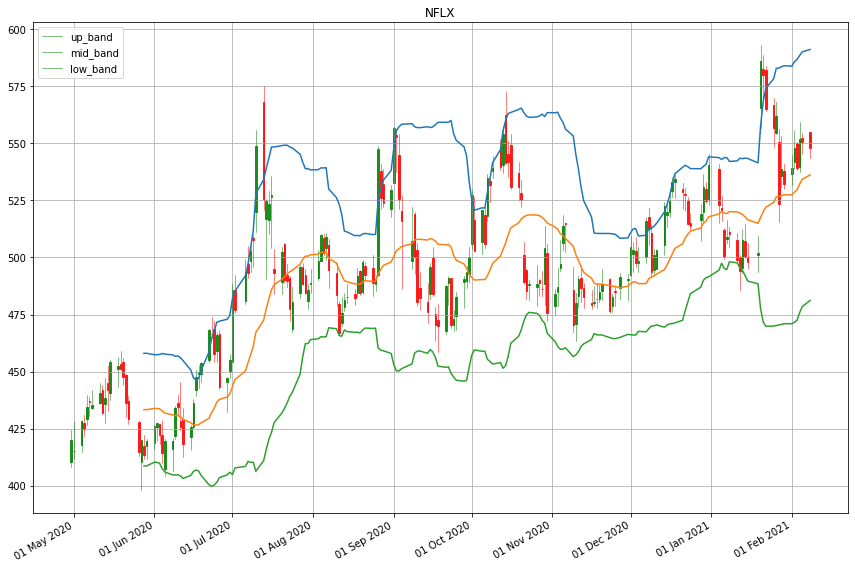

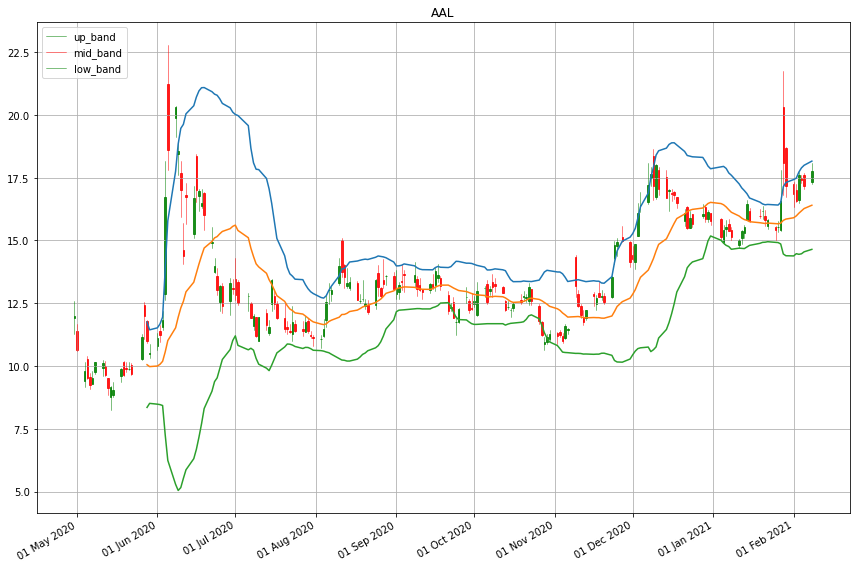

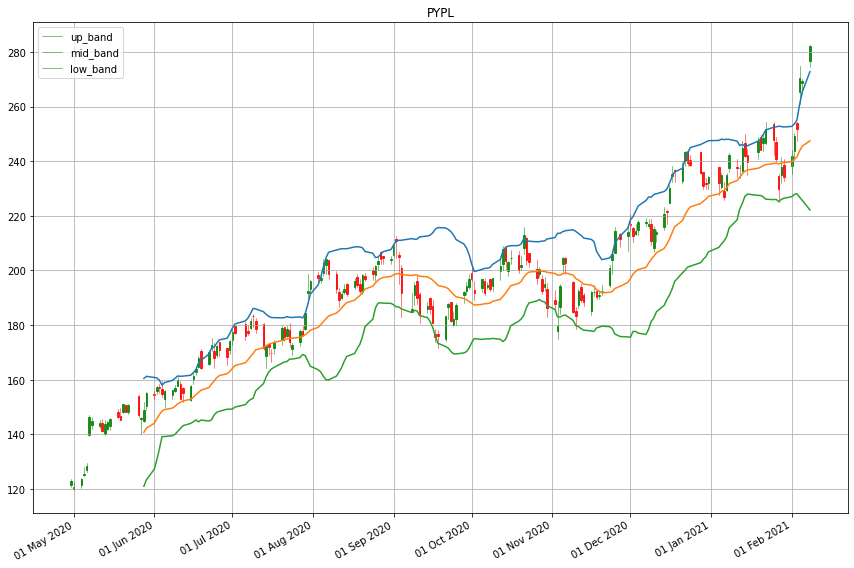

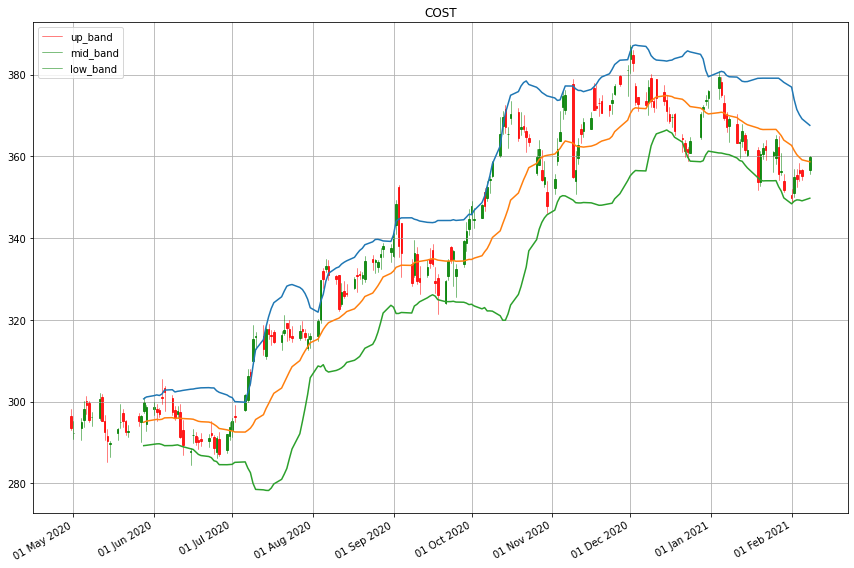

In [13]:
for i in range(len(num_name)):
    plotBB(i)